# PyPI Dependency Graph

In [1]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

def get_dependencies(package_name):
    """Fetches dependencies for a given package from PyPI."""
    url = f"https://pypi.org/pypi/{package_name}/json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if not data: return []
        requires_dist = data['info'].get('requires_dist', [])
        dependencies = [req.split()[0] for req in requires_dist if req]
        return dependencies
    else:
        return []

def build_dependency_graph(package_name, max_depth=3):
    """Builds a dependency graph using NetworkX."""
    G = nx.DiGraph()
    to_visit = [(package_name, 0)]
    visited = set()

    while to_visit:
        current_package, depth = to_visit.pop(0)
        if current_package not in visited and depth <= max_depth:
            visited.add(current_package)
            dependencies = get_dependencies(current_package)
            for dep in dependencies:
                G.add_edge(current_package, dep)
                to_visit.append((dep, depth + 1))
    
    return G

def get_latest_update_date(package_name):
    """Fetches the latest update date of a package from PyPI."""
    url = f"https://pypi.org/pypi/{package_name}/json"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        releases = data.get('releases', {})
        
        # Extract all release dates
        release_dates = [
            release_info[0]['upload_time'] 
            for version, release_info in releases.items() 
            if release_info
        ]
        
        # Find the most recent date
        if release_dates:
            latest_date = max(release_dates)
            return latest_date
        else:
            return "No releases found"
    else:
        return "Package not found"

def draw_graph(G):
    """Draws the graph using Matplotlib."""
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
    plt.show()

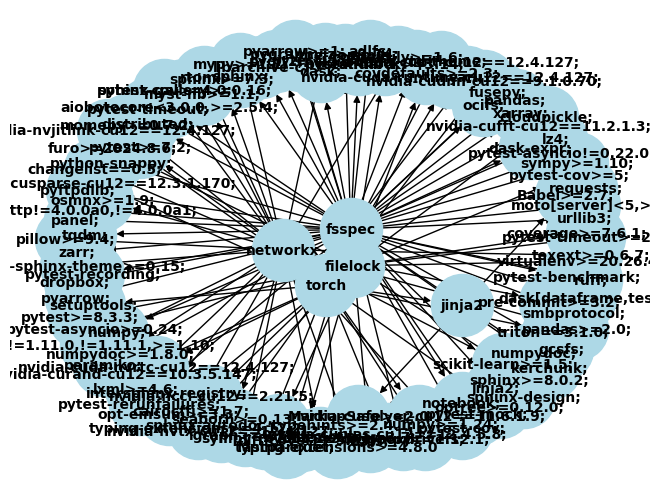

The latest update date for torch is: 2024-10-17T14:45:49


In [3]:
package_name = "torch"  # Example package
graph = build_dependency_graph(package_name, max_depth=2)
draw_graph(graph)
latest_update_date = get_latest_update_date(package_name)
print(f"The latest update date for {package_name} is: {latest_update_date}")